In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing 

In [2]:
heart = pd.read_csv(r'C:\Users\ShahabiD\Documents\Fianl Project CoderGirl\heart_prepared_Data.csv')

In [3]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# KNN Model

In [4]:
heart_features =heart.drop(["target"], axis=1)
heart_label = heart["target"]

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6,p=2, metric='minkowski')
x = heart_features
y = heart_label
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [6]:
#    "just to test the prediction of the model"
x_new = ([[37, 1, 2, 130, 251, 0, 1, 187, 0, 3.5, 0, 0, 2]])
y_new = knn.predict(x_new)
y_new

array([1], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42, stratify = y, shuffle= True)

In [8]:
x_train.shape

(198, 13)

In [9]:
x_test.shape

(86, 13)

In [16]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

In [17]:
knn.score(x_test, y_test)

0.6976744186046512

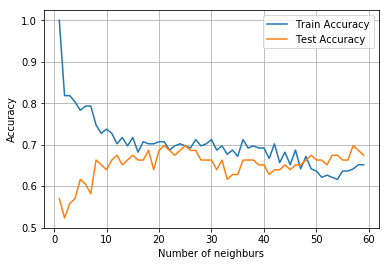

In [15]:
neigburs = np.arange(1, 60)
train_accuary = np.empty(len(neigburs))
test_accuary = np.empty(len(neigburs))
for i, k in enumerate (neigburs):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuary[i] = knn_model.score(x_train, y_train)
    test_accuary[i] = knn_model.score(x_test, y_test)

plt.plot(neigburs, train_accuary, label = "Train Accuracy")
plt.plot(neigburs, test_accuary, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel("Number of neighburs")
plt.ylabel("Accuracy");

It seems if we set n_neighbors= 21, the KNN model has the best performance

In [21]:
# Use Random Forest to find the most important features for our KNN Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(heart, x)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

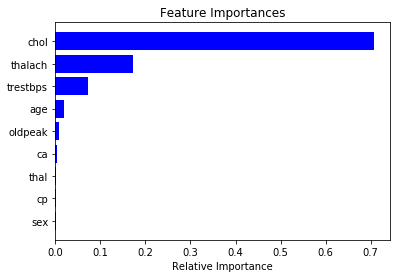

In [28]:
features = heart.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Redo the KNN with top 3 feturs

In [29]:
heart_features2 =heart[["chol", "thalach", "trestbps" ]]
heart_label2 = heart["target"]

x2 = heart_features2
y2 = heart_label2

In [51]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.3, random_state=42, stratify = y2)
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(x_train2, y_train2)
y_predict2 = knn.predict(x_test2)
knn2.score(x_test2, y_test2)

0.7093023255813954

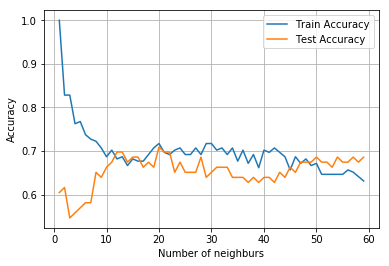

In [52]:
neigburs = np.arange(1, 60)
train_accuary = np.empty(len(neigburs))
test_accuary = np.empty(len(neigburs))
for i, k in enumerate (neigburs):
    knn2_model = KNeighborsClassifier(n_neighbors=k)
    knn2_model.fit(x_tr2, y_tr2)
    train_accuary[i] = knn2_model.score(x_tr2, y_tr2)
    test_accuary[i] = knn2_model.score(x_ts2, y_ts2)

plt.plot(neigburs, train_accuary, label = "Train Accuracy")
plt.plot(neigburs, test_accuary, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel("Number of neighburs")
plt.ylabel("Accuracy");

# Confusion Matrix

In [43]:
x_test.shape

(86, 13)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(confusion_matrix(y_test2, y_predict2, [0,1]))
print(classification_report(y_test2, y_predict2))

[[25 13]
 [12 36]]
             precision    recall  f1-score   support

          0       0.68      0.66      0.67        38
          1       0.73      0.75      0.74        48

avg / total       0.71      0.71      0.71        86



We had 86 cases for test and 25 cases are True-Positive and 36 Cases are False-Negative. Overall 71% of cases identified correctly.

In [62]:
from sklearn.metrics import roc_curve
y_pred_prob = knn2.predict_proba(x_test2)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

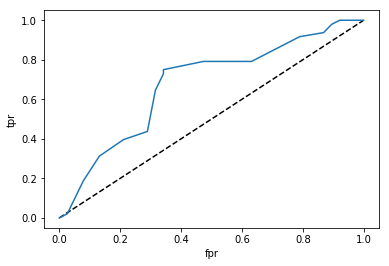

In [63]:
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr");

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test2, y_pred_prob)
#as much as the auc is closing to 1, we have a better model

0.6768092105263157

# Logestic Regression 

In [65]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [66]:
heart_features =heart.drop(["target"], axis=1)
heart_label = heart["target"]

x = heart_features
y = heart_label

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state=42, stratify = y, shuffle= True)

In [68]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

In [69]:
log.score(x_train,y_train)

0.8764705882352941

In [70]:
cm = confusion_matrix(y_test, y_pred,[0,1]) #Confusion Matrix
cm

array([[34, 16],
       [ 2, 62]], dtype=int64)

In [71]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.68      0.79        50
          1       0.79      0.97      0.87        64

avg / total       0.86      0.84      0.84       114



In [72]:
from sklearn.metrics import roc_curve
y_pred_prob = log.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

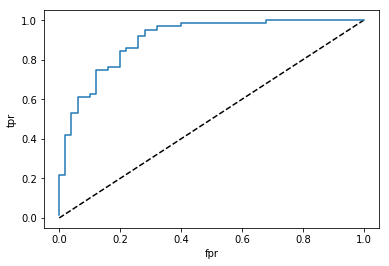

In [73]:
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr");

In [74]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)
#as much as the auc is closing to 1, we have a better model

0.901875

It seems Regression is a better model for our prediction. It has better AUC, precision and recall

# Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1,50)}

In [76]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(x,y)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 15}
0.676056338028169


# Decisio Tree's Parameters

In [ ]:
from scipy.stats import randint
# randint(1,9).rvs(4)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


params = {"max_depth":[None, 3] , 
          "max_features": randint(1,9)}
#           "min_samples_split": randint(1,9)}

In [ ]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, params, cv=10)
tree_cv.fit(x_train, y_train)

print(tree_cv.best_params_)
print(tree_cv.best_score_)


score = tree_cv.score(x_test, y_test)
print(score)

# Naive Basian

based on the liklihood of happen\unhappen an event will clasify an outcome

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [78]:
gnb.score(x_test,y_test)

0.8245614035087719

# Unsupervised Learning

K-Means - Finds Cluster of Sample

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [81]:
kmn = KMeans(n_clusters= 3)
kmn.fit(heart)
labels = kmn.predict(heart)

In [82]:
labels

array([2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0,
       2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1,
       1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2])

In [83]:
centroids = kmn.cluster_centers_

In [84]:
centroids

array([[5.68815789e+01, 6.31578947e-01, 8.68421053e-01, 1.34013158e+02,
        2.99250000e+02, 1.44736842e-01, 4.47368421e-01, 1.42710526e+02,
        4.21052632e-01, 9.84210526e-01, 1.43421053e+00, 8.68421053e-01,
        2.39473684e+00, 4.34210526e-01],
       [5.18351648e+01, 7.25274725e-01, 1.02197802e+00, 1.27307692e+02,
        1.93274725e+02, 1.42857143e-01, 6.37362637e-01, 1.49021978e+02,
        2.96703297e-01, 9.85714286e-01, 1.43956044e+00, 4.72527473e-01,
        2.17582418e+00, 6.04395604e-01],
       [5.37948718e+01, 7.26495726e-01, 1.04273504e+00, 1.29273504e+02,
        2.42897436e+02, 1.36752137e-01, 4.87179487e-01, 1.55598291e+02,
        2.64957265e-01, 8.96581197e-01, 1.41880342e+00, 6.15384615e-01,
        2.32478632e+00, 6.06837607e-01]])

In [86]:
plt.scatter(heart[:,0], heart[:,2], c= labels)
plt.scatter(centroids[:,0], centroids[:,2], marker = "x", s= 250);

TypeError: unhashable type: 'slice'

In [ ]:
kmn.inertia_

In [ ]:
inertia_list = []

for k in np.arange(1,6):
    kmn = KMeans(n_clusters=k)
    kmn.fit(iris.data)
    inertia_list.append(kmn.inertia_)
    
inertia_list

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(1,6), inertia_list, 'ro-')
plt.xlabel("Number of Cluster")
plt.ylabel("inertia")

The less inertia is better!after 3 cluster, there is no more significant change.

# Hierarchical Clustring

Wikipedia :
a dendrogram (from Greek dendro "tree" and gramma "drawing") is a tree diagram frequently
used to illustrate the arrangement of the clusters produced by hierarchical clustering.
This is a "bottom up" approach called Agglomerative.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15,5))
hirarichal = linkage(iris.data, method = "complete")
dendrogram(hirarichal)
plt.show()

In [ ]:
labels = fcluster(hirarichal, 3, criterion= "distance")

In [ ]:
labels

In [ ]:
plt.scatter(iris.data[:,0], iris.data[:,2], c=labels);

MeanShift

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
ms = MeanShift()   #ms = MeanShift(bandwidth=5)
ms.fit(iris.data)
labels = ms.labels_
labels

In [ ]:
cluster_centers = ms.cluster_centers_

In [ ]:
plt.scatter(iris.data[:,0], iris.data[:,2], c=labels)
plt.scatter(cluster_centers[:,0],cluster_centers[:,2], marker="x", s=550, linewidth=10 )

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan.fit(iris.data)
labels = dbscan.labels_

In [ ]:
labels

In [ ]:
plt.scatter(iris.data[:,0],iris.data[:,2], c=labels )

# Dimensity Reduction

In [ ]:
PCA:
    decorrelation
    Reduction

In [ ]:
import numpy as np
from scipy.stats import pearsonr


In [ ]:

seed = np.genfromtxt(r'C:\Users\ShahabiD\Documents\Python Machine Learning\FVML9606K [www.FaraDars.org]\Files and Codes\seeds-width-vs-length.csv', delimiter=",")
wight = seed[:,0]
lenght= seed[:,1]

In [ ]:
correlation = pearsonr(wight, lenght)
correlation

In [ ]:
plt.plot(wight, lenght, "ro")
plt.xlabel("weight")
plt.ylabel("lenght");

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(seed)
transformed = pca.transform(seed)

mean = pca.mean_
FPC = pca.components_[0]

In [ ]:
FPC

In [ ]:
plt.scatter(wight,lenght)
plt.arrow(mean[0], mean[1], FPC[0], FPC[1], color="red", width=0.01)

In [ ]:
plt.scatter(transformed[:,0], transformed[:,1]);

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

versicolor = iris.data[50:100]
versicolor = versicolor[:,[0,1,3]]

ax.scatter(versicolor[:,0], versicolor[:,1], versicolor[:,2], c= 'red')

ax.set_title("iris versicolor")
ax.set_xlabel("Sepal Lengh")
ax.set_ylabel("Sepal width")
ax.set_zlabel("petal width")

# PCA for IRIS Data

In [ ]:
iris_model = PCA()
iris_model.fit(iris.data[:,[0,2]])
iris_transformed = iris_model.transform(iris.data[:,[0,2]])

In [ ]:
mean = iris_model.mean_
First_PC = iris_model.components_[0]

In [ ]:
plt.scatter(iris.data[:,0], iris.data[:,2])
plt.arrow(mean[0], mean[1], First_PC[0], First_PC[1], color="red", width = 0.1)

In [ ]:
plt.scatter(iris_transformed[:,0], iris_transformed[:,1]);